# Week 1: Exploratory Data Analysis (PlantVillage Dataset)

## 🎯 Objective
To assess the feasibility of training a disease classification model by analyzing the **PlantVillage dataset**. This notebook audits image quality, class balance, and biological feature separability.

## 📊 Key Questions
1. **Data Quality:** Are the images standardized (size, lighting, background)?
2. **Class Balance:** Do we have enough data for every disease?
3. **Feasibility:** Can simple mathematical features (Color, Texture) distinguish diseases, or do we need Deep Learning?

# Section 1: Setup & Data Loading

In [1]:
import pandas as pd
from pathlib import Path

# Point specifically to the 'color' folder to avoid mixing grayscale/segmented images
data_dir = Path('../input/plantvillage-dataset/color')

# Recursively search for images (*.jpg) inside the color folder
# path.parts[-2:] retrieves the last two parts of the path: (Folder_Name, File_Name)
# This maps exactly to (Class, Image_Name)
paths = [path.parts[-2:] for path in data_dir.rglob('*.JPG')] 

# Create the DataFrame with the exact columns you requested
df = pd.DataFrame(data=paths, columns=['Class', 'Images'])

# Sort by Class name
df = df.sort_values('Class', ascending=True)

# Reset the index to look clean (0, 1, 2, 3...)
df.reset_index(drop=True, inplace=True)

# Display the dataframe
df.head()

Class                                             Images
0  Apple___Apple_scab  919f1400-c9b6-4343-9708-0e70deabb85d___FREC_Sc...
1  Apple___Apple_scab  daf6db9e-a600-449c-8b66-482ab50ea431___FREC_Sc...
2  Apple___Apple_scab  9a544639-1fc6-4c45-88e4-3049c2bc0814___FREC_Sc...
3  Apple___Apple_scab  99a971b6-cd13-4ed2-8fc5-0d6769945578___FREC_Sc...
4  Apple___Apple_scab  debd9885-73c5-4ba8-9a95-f820846cec77___FREC_Sc...

In [2]:
# 1. Check the true dimensions of your table
print(f"Total Rows: {len(df)}")        # Should print 52803 (or similar)
print(f"Table Shape: {df.shape}")      # Should print (52803, 2)

# 2. Display the top AND bottom of the table
display(df)

Total Rows: 52803
Table Shape: (52803, 2)


Class                                             Images
0      Apple___Apple_scab  919f1400-c9b6-4343-9708-0e70deabb85d___FREC_Sc...
1      Apple___Apple_scab  daf6db9e-a600-449c-8b66-482ab50ea431___FREC_Sc...
2      Apple___Apple_scab  9a544639-1fc6-4c45-88e4-3049c2bc0814___FREC_Sc...
3      Apple___Apple_scab  99a971b6-cd13-4ed2-8fc5-0d6769945578___FREC_Sc...
4      Apple___Apple_scab  debd9885-73c5-4ba8-9a95-f820846cec77___FREC_Sc...
...                   ...                                                ...
52798    Tomato___healthy  6ddb8b0b-5d74-4381-8787-6229de8d51fc___GH_HL L...
52799    Tomato___healthy  1c092a12-ed60-42c8-86b4-0427db78a5d3___RS_HL 0...
52800    Tomato___healthy  2a8f7c7a-fbd4-4669-90eb-61ee118db2a7___RS_HL 0...
52801    Tomato___healthy  488feb1c-4b9f-44e7-8aa6-4103a9601f5f___GH_HL L...
52802    Tomato___healthy  c04a8a0a-2ab7-4494-9fa3-88aea29338d8___RS_HL 0...

[52803 rows x 2 columns]

In [3]:
# Check if the dataframe is empty
if len(df) == 0:
    print("Error: No images found. Check if the dataset is added to the notebook.")
else:
    print(f"Success! Found {len(df)} images.")
    print(f"Example Class: {df.iloc[453]['Class']}")
    print(f"Example Image: {df.iloc[453]['Images']}")

Success! Found 52803 images.
Example Class: Apple___Apple_scab
Example Image: 75896d3d-899a-4143-9262-c44bcea75237___FREC_Scab 3295.JPG


# Section 2: Class Distribution

## **Goal:** 
Identify underrepresented classes that might cause model bias.

## **Why this matters:**
If our dataset is 90% "Tomato" and only 10% "Potato", the model will become "lazy" and predict Tomato for everything. We visualize this hierarchy to decide if we need data augmentation later.

Count the number of image datasets
Image Count : 52803
Class Count : 38 

Count the number of images in each class
Class
Orange___Haunglongbing_(Citrus_greening)              5507
Tomato___Tomato_Yellow_Leaf_Curl_Virus                5357
Soybean___healthy                                     5090
Peach___Bacterial_spot                                2297
Tomato___Bacterial_spot                               2127
Squash___Powdery_mildew                               1813
Tomato___Septoria_leaf_spot                           1771
Tomato___Late_blight                                  1756
Tomato___Spider_mites Two-spotted_spider_mite         1676
Apple___healthy                                       1645
Tomato___healthy                                      1590
Blueberry___healthy                                   1502
Pepper,_bell___healthy                                1476
Tomato___Target_Spot                                  1404
Grape___Esca_(Black_Measles)                         

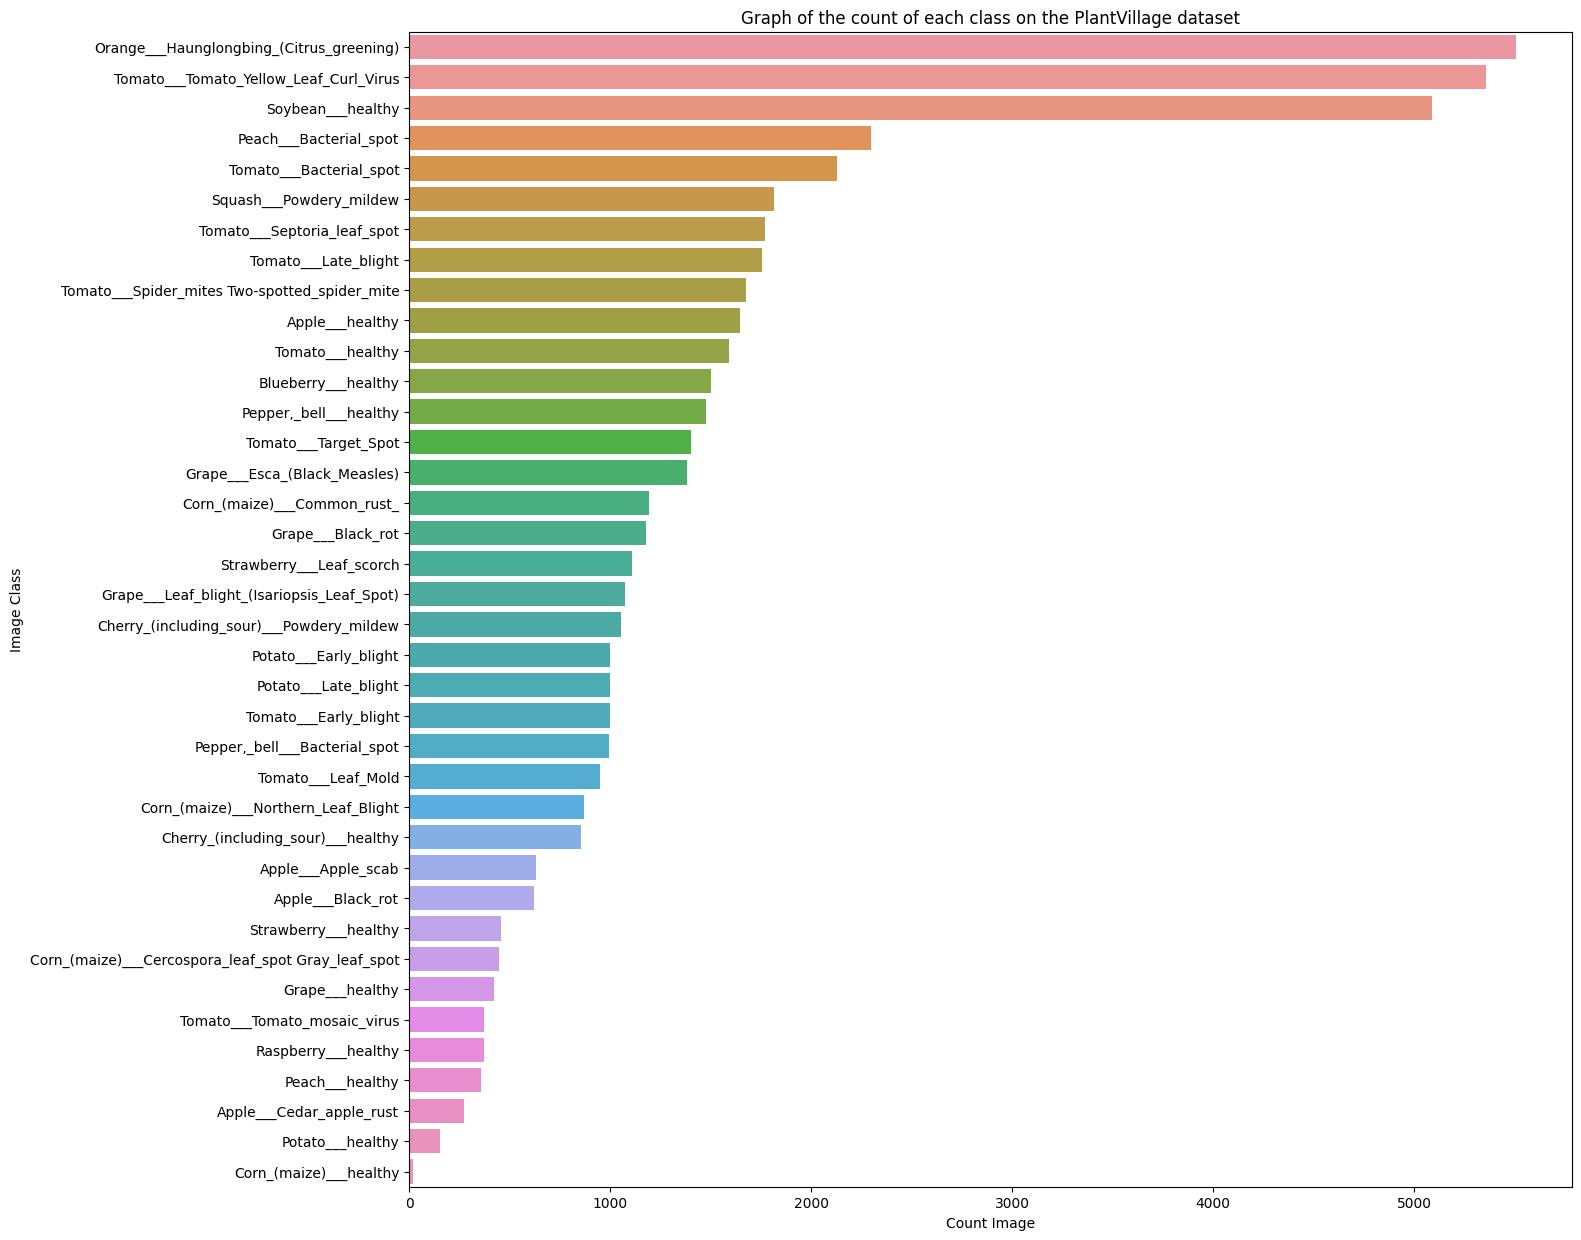

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt

print('Count the number of image datasets')
print("Image Count : {}".format(len(df.Images)))
print("Class Count : {} \n".format(len(df['Class'].value_counts())))
print('Count the number of images in each class')
print(df['Class'].value_counts())

# Plotting
# We increase height (15, 15) because there are 38 classes
fig, ax = plt.subplots(figsize=(15, 15)) 
# changed x='Class' to y='Class' so labels are horizontal and readable
sns.countplot(data=df, y='Class', order=df['Class'].value_counts().index) 
plt.title('Graph of the count of each class on the PlantVillage dataset')
plt.ylabel('Image Class')
plt.xlabel('Count Image')
plt.show()

In [5]:
import plotly.express as px

class_counts = df['Class'].value_counts()

fig = px.pie(
    values=class_counts.values,
    names=class_counts.index,
    hole=0.45,
    title="Data Distribution – PlantVillage Dataset"
)

fig.update_traces(textinfo='percent')
fig.update_layout(title_x=0.5)
fig.show()

In [6]:
import plotly.express as px

# 1. Split 'Class' into 'Plant' and 'Disease'
# The structure is usually "Tomato___Bacterial_spot"
df['Plant'] = df['Class'].apply(lambda x: x.split('___')[0])
df['Disease'] = df['Class'].apply(lambda x: x.split('___')[1])

# 2. Group by Plant to see the major categories
plant_counts = df['Plant'].value_counts().reset_index()
plant_counts.columns = ['Plant', 'Count']

# 3. Visualization: Sunburst Chart
# This shows the hierarchy: Center = Total, Inner Ring = Plant, Outer Ring = Disease
fig = px.sunburst(
    df, 
    path=['Plant', 'Disease'], 
    title='Hierarchical Distribution: Plant Types -> Diseases',
    width=800, height=800
)
fig.show()

In [7]:
import plotly.express as px

# 1. Feature Engineering: Extract Plant Name and Health Status
df['Plant'] = df['Class'].apply(lambda x: x.split('___')[0])
df['Status'] = df['Class'].apply(lambda x: 'Healthy' if 'healthy' in x.lower() else 'Diseased')

# 2. Aggregation: Count Healthy vs Diseased per Plant
health_stats = df.groupby(['Plant', 'Status']).size().reset_index(name='Count')

# 3. Visualization: 100% Stacked Bar Chart
# This shows the PERCENTAGE split, which is more useful than raw counts for this specific question
fig = px.bar(
    health_stats, 
    x='Plant', 
    y='Count', 
    color='Status', 
    title='Vegetable Health Report Card: % Healthy vs. Diseased',
    barmode='group', # Change to 'relative' (stacked) if you prefer 100% stack
    color_discrete_map={'Healthy': '#2ecc71', 'Diseased': '#e74c3c'}, # Green vs Red
    text='Count'
)

fig.update_layout(yaxis_title="Number of Images", xaxis_title="Vegetable Type")
fig.show()

In [8]:
import plotly.express as px

# 1. Ensure the 'Plant' and 'Disease' columns exist (Just in case you deleted the previous cell)
df['Plant'] = df['Class'].apply(lambda x: x.split('___')[0])
df['Disease'] = df['Class'].apply(lambda x: x.split('___')[1])

# 2. Aggregating the data
plant_disease_counts = df.groupby(['Plant', 'Disease']).size().reset_index(name='Count')

# 3. Visualization: Stacked Bar Chart
fig = px.bar(
    plant_disease_counts, 
    x='Plant', 
    y='Count', 
    color='Disease', 
    title='Total Image Count by Plant Species (Stacked by Disease)',
    text='Count', # Show numbers on the bars
    height=700
)

# Polish the layout
fig.update_traces(textposition='inside', textfont_size=10)
fig.update_layout(xaxis_title="Plant Species", yaxis_title="Number of Images", uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [9]:
# Treemap Visualization
fig = px.treemap(
    df, 
    path=['Plant', 'Disease'], 
    title='Relative Size of Dataset Classes (Treemap)',
    width=1000, 
    height=800
)

# This adds a nice hover effect so you can see the exact counts
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

# Section 3: Data Quality Audit

Before training, we must verify that our "raw materials" (images) are high quality. We check four critical properties:
1. **Dimensions:** Do we need to resize images?
2. **Blur:** Are there low-quality samples that should be discarded?
3. **Lighting:** Are images taken under consistent lab lighting or random outdoor conditions?
4. **Background:** Is the background uniform (easy) or noisy (hard)?

### 3.1 Resolution Standardization Check
**Action:** We sample images to check their width and height.
**Why:** CNNs (Convolutional Neural Networks) require fixed input sizes (e.g., 224x224). If our dataset contains a mix of 1920x1080 and 500x500 images, we will need a complex resizing pipeline. If they are all 256x256, we save massive preprocessing time.

Processing 52803 images... this might take a minute.
[########################################] | 100% Completed | 206.90 s

--- Image Dimension Report ---
   width  height  count
0    256     256  52803


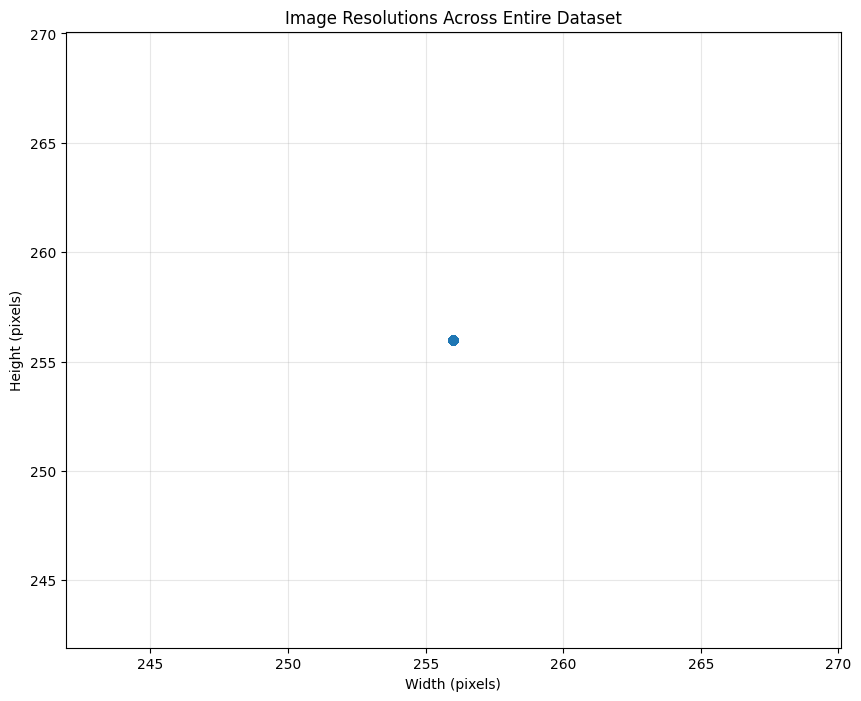


✅ All 52803 images are exactly 256x256.


In [10]:
import dask.bag as db
from dask.diagnostics import ProgressBar
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Helper function to get dimensions
def get_dims(file_path):
    try:
        with Image.open(file_path) as im:
            return im.size  # returns (width, height)
    except:
        return (None, None)

# 2. FIXED: Reconstruct the full paths using your existing 'Class' and 'Images' columns
# We combine the base directory + Class folder + Image filename
base_dir = '../input/plantvillage-dataset/color'
all_file_paths = [f"{base_dir}/{row['Class']}/{row['Images']}" for index, row in df.iterrows()]

print(f"Processing {len(all_file_paths)} images... this might take a minute.")

# 3. Use Dask to process all images in parallel
dims_bag = db.from_sequence(all_file_paths, npartitions=10).map(get_dims)

with ProgressBar():
    dims = dims_bag.compute()

# 4. Create a DataFrame of the results
dim_df = pd.DataFrame(dims, columns=['width', 'height'])
dim_df['Class'] = df['Class'] 

# 5. ANALYSIS: Group by size to see common resolutions
size_counts = dim_df.groupby(['width', 'height']).size().reset_index().rename(columns={0:'count'})

print("\n--- Image Dimension Report ---")
print(size_counts)

# 6. Visualization
plt.figure(figsize=(10, 8))
plt.scatter(dim_df['width'], dim_df['height'], alpha=0.5)
plt.title('Image Resolutions Across Entire Dataset')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.grid(True, alpha=0.3)
plt.show()

# 7. Check for anomalies
standard_w, standard_h = 256, 256 
anomalies = dim_df[(dim_df['width'] != standard_w) | (dim_df['height'] != standard_h)]

if not anomalies.empty:
    print(f"\n⚠️ FOUND {len(anomalies)} IMAGES WITH DIFFERENT SIZES:")
    print(anomalies['Class'].value_counts())
else:
    print(f"\n✅ All {len(dim_df)} images are exactly {standard_w}x{standard_h}.")

All the images have the same aspect ratio

Target classes not found, sampling 600 random images...
Sampling background colors (Top-Left Corner Analysis)...


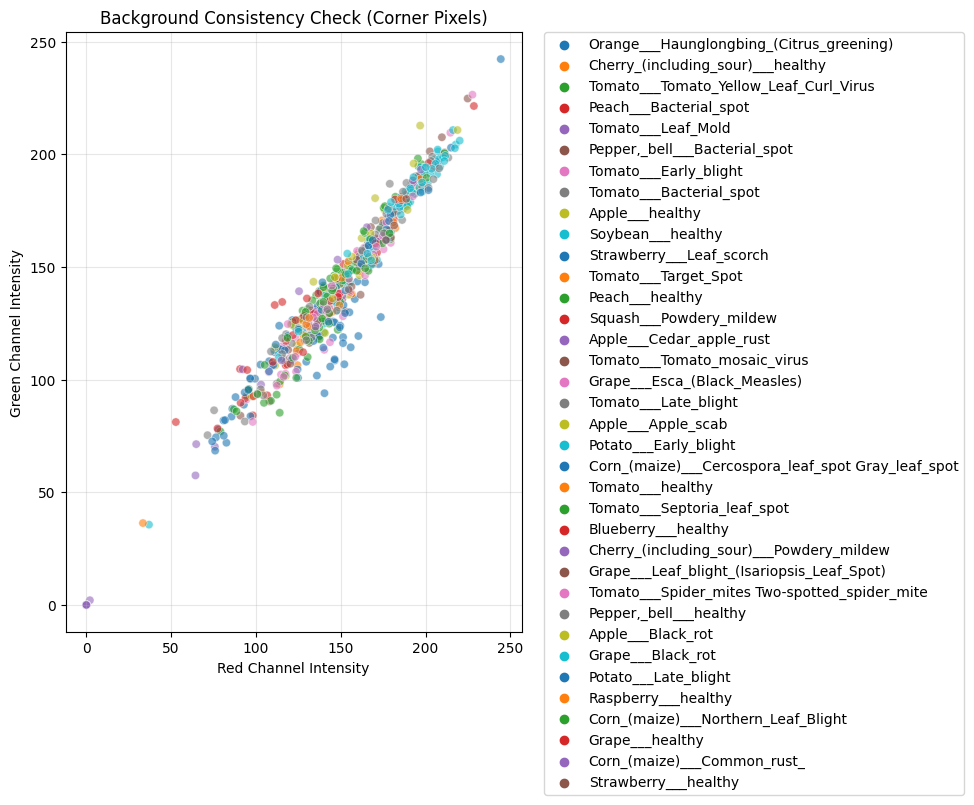

In [11]:
import cv2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. SETUP: Create the dataframe 'lighting_df' if it doesn't exist
# We try to use your 'target_classes' list if it exists, otherwise we take a random sample
if 'target_classes' in locals():
    print(f"Using target classes: {target_classes}")
    lighting_df = df[df['Class'].isin(target_classes)].groupby('Class').head(200).copy()
else:
    print("Target classes not found, sampling 600 random images...")
    lighting_df = df.sample(600).copy()

# 2. Add the 'full_path' column (Crucial Step!)
lighting_df['full_path'] = lighting_df.apply(
    lambda row: f"../input/plantvillage-dataset/color/{row['Class']}/{row['Images']}", axis=1
)

# 3. Define the Background Function
def get_background_color(path):
    img = cv2.imread(path)
    if img is None: return [0, 0, 0]
    # Crop the top-left corner (20x20 pixels) to sample the background
    corner = img[0:20, 0:20]
    # Calculate mean color
    return corner.mean(axis=(0, 1))

# 4. Run the Analysis
print("Sampling background colors (Top-Left Corner Analysis)...")
lighting_df['bg_color'] = lighting_df['full_path'].apply(get_background_color)
lighting_df[['B', 'G', 'R']] = pd.DataFrame(lighting_df['bg_color'].tolist(), index=lighting_df.index)

# 5. Visualization
import cv2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ... (Previous setup code for lighting_df remains the same) ...

# 5. Visualization with FIXED Legend
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=lighting_df, 
    x='R', 
    y='G', 
    hue='Class', 
    palette='tab10', 
    alpha=0.6
)

plt.title('Background Consistency Check (Corner Pixels)')
plt.xlabel('Red Channel Intensity')
plt.ylabel('Green Channel Intensity')
plt.grid(True, alpha=0.3)

# --- THE FIX ---
# bbox_to_anchor=(x, y): (1.05, 1) means "Move it slightly to the right of the graph"
# loc='upper left': Means "The top-left corner of the legend box should be at that anchor point"
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# tight_layout ensures the saved image includes the external legend
plt.tight_layout() 
plt.show()

### 3.2 Image Sharpness Audit (Blur Detection)
**Action:** We calculate the "Variance of Laplacian" for a sample of images.
**Why:** Blurry images confuse the model. High variance (>100) indicates sharp edges; low variance (<10) indicates a blurry mess. If a specific class (e.g., *Soybean*) has consistently low scores, the photographer likely had a bad focus, and that class might have poor model performance.

Auditing image quality across different vegetables...


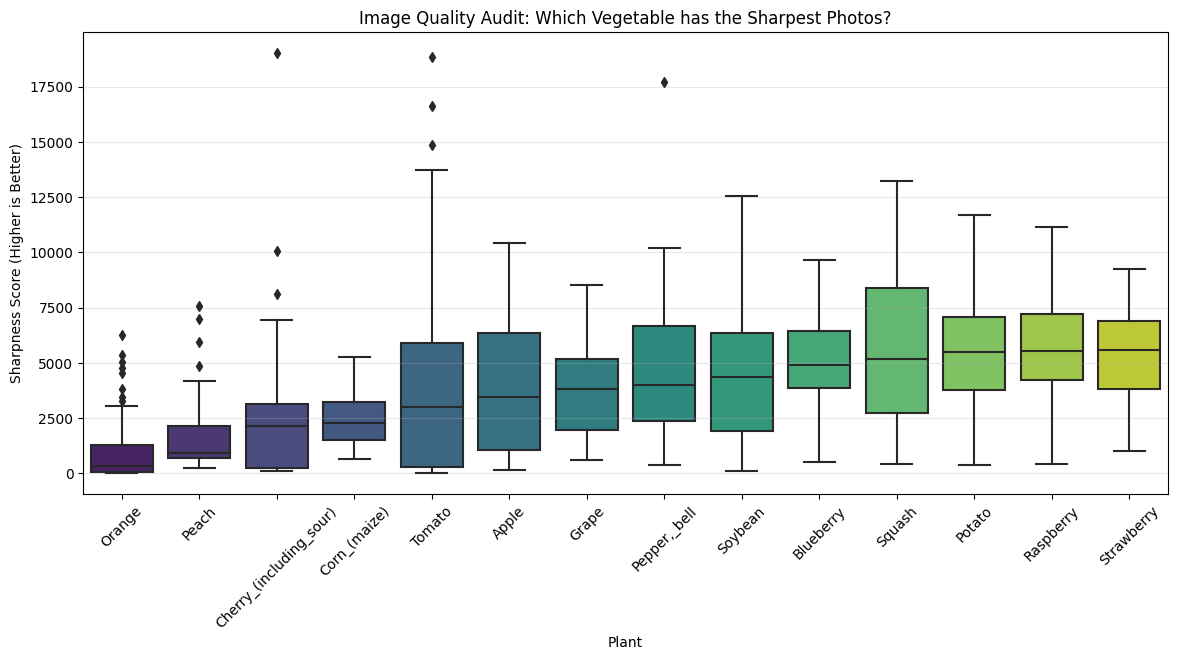

In [12]:
import cv2
import seaborn as sns
import matplotlib.pyplot as plt

# We need the calculate_blur function (Variance of Laplacian)
def calculate_blur(path):
    img = cv2.imread(path)
    if img is None: return 0
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return cv2.Laplacian(gray, cv2.CV_64F).var()

# 1. Sample data (taking 50 images per plant to be fast)
quality_df = df.groupby('Plant').sample(50, replace=True).copy()

# 2. Reconstruct Paths
quality_df['full_path'] = quality_df.apply(
    lambda row: f"../input/plantvillage-dataset/color/{row['Class']}/{row['Images']}", axis=1
)

# 3. Calculate Score
print("Auditing image quality across different vegetables...")
quality_df['Sharpness'] = quality_df['full_path'].apply(calculate_blur)

# 4. Visualization: Boxplot sorted by quality
# We calculate median sharpness to sort the plot from "Blurriest Plant" to "Sharpest Plant"
order = quality_df.groupby('Plant')['Sharpness'].median().sort_values().index

plt.figure(figsize=(14, 6))
sns.boxplot(x='Plant', y='Sharpness', data=quality_df, order=order, palette='viridis')
plt.title('Image Quality Audit: Which Vegetable has the Sharpest Photos?')
plt.xticks(rotation=45)
plt.ylabel('Sharpness Score (Higher is Better)')
plt.grid(True, axis='y', alpha=0.3)
plt.show()

Calculating blur scores... (This detects edge sharpness)

--- Sharpness Statistics ---
count      100.000000
mean      3869.314234
std       3719.196977
min         53.440745
25%       1226.841156
50%       3092.412303
75%       5369.301831
max      22786.471486
Name: sharpness_score, dtype: float64


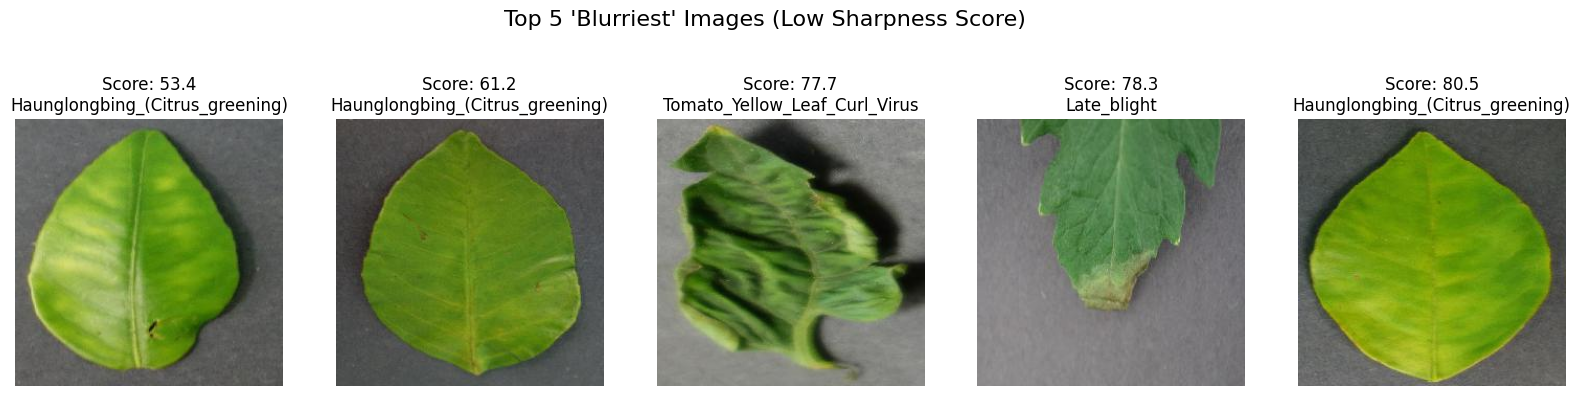

In [13]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

def calculate_blur(path):
    """
    Returns the variance of Laplacian. 
    High score (>100) = Sharp. Low score (<100) = Blurry.
    """
    img = cv2.imread(path)
    if img is None: return 0
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return cv2.Laplacian(gray, cv2.CV_64F).var()

# Run on a random sample of 100 images
# We use .copy() to prevent warnings
sample_blur_df = df.sample(100).copy()
sample_blur_df['full_path'] = sample_blur_df.apply(
    lambda row: f"../input/plantvillage-dataset/color/{row['Class']}/{row['Images']}", axis=1
)

print("Calculating blur scores... (This detects edge sharpness)")
sample_blur_df['sharpness_score'] = sample_blur_df['full_path'].apply(calculate_blur)

# Show the statistics
print("\n--- Sharpness Statistics ---")
print(sample_blur_df['sharpness_score'].describe())

# Visualizing the "Blurriest" images found
blurry_images = sample_blur_df.sort_values('sharpness_score').head(5)

plt.figure(figsize=(20, 5))
plt.suptitle("Top 5 'Blurriest' Images (Low Sharpness Score)", fontsize=16)

for i, (idx, row) in enumerate(blurry_images.iterrows()):
    plt.subplot(1, 5, i+1)
    img = Image.open(row['full_path'])
    plt.imshow(img)
    plt.title(f"Score: {row['sharpness_score']:.1f}\n{row['Class'].split('___')[-1]}")
    plt.axis('off')

plt.show()

Comparing lighting for: ['Apple___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Peach___Bacterial_spot']
Calculating lighting intensity (Brightness)...


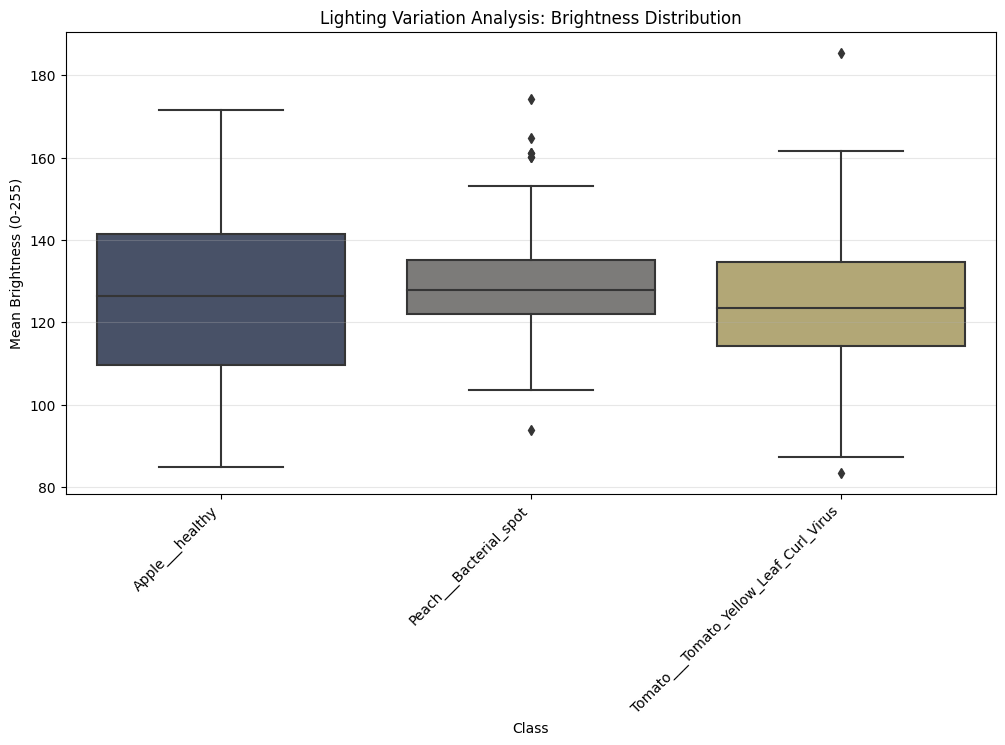

In [14]:
import cv2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- STEP 1: FIX - Define target_classes explicitly ---
# We try to find one of each: Healthy, Virus, and Bacterial
keywords = ['Healthy', 'Virus', 'Bacterial']
target_classes = []

# Search for classes matching our keywords
for kw in keywords:
    match = next((c for c in df['Class'].unique() if kw.lower() in c.lower()), None)
    if match: target_classes.append(match)

# If we couldn't find them (e.g., different dataset names), just take the first 3
if not target_classes: 
    target_classes = df['Class'].unique()[:3].tolist()

print(f"Comparing lighting for: {target_classes}")

# --- STEP 2: The Analysis ---
def get_brightness_stats(path):
    img = cv2.imread(path)
    if img is None: return 0
    # Convert to HSV (Hue, Saturation, Value)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # Return the mean of the V (Brightness) channel
    return hsv[:,:,2].mean()

# Sample data for speed (200 images per class)
lighting_df = df[df['Class'].isin(target_classes)].groupby('Class').head(200).copy()

# Reconstruct paths
lighting_df['full_path'] = lighting_df.apply(
    lambda row: f"../input/plantvillage-dataset/color/{row['Class']}/{row['Images']}", axis=1
)

print("Calculating lighting intensity (Brightness)...")
lighting_df['Brightness'] = lighting_df['full_path'].apply(get_brightness_stats)

# Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Brightness', data=lighting_df, palette='cividis')
plt.title('Lighting Variation Analysis: Brightness Distribution')
plt.ylabel('Mean Brightness (0-255)')
# Fix legend overlapping issues if they happen
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', alpha=0.3)
plt.show()

### 3.3 Zoom Bias Check (Leaf Ratio)
**Action:** We threshold the image to separate green pixels (leaf) from the background and calculate the coverage percentage.
**Why:** **"Clever Hans" Effect.** If all "Healthy" images are zoomed-out (small leaves) and all "Diseased" images are macro shots (big leaves), the model might cheat by learning *zoom level* instead of *disease patterns*. We want a consistent distribution of leaf sizes.

Checking Leaf Ratio for: ['Apple___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Peach___Bacterial_spot']
Calculating leaf-to-background ratios...


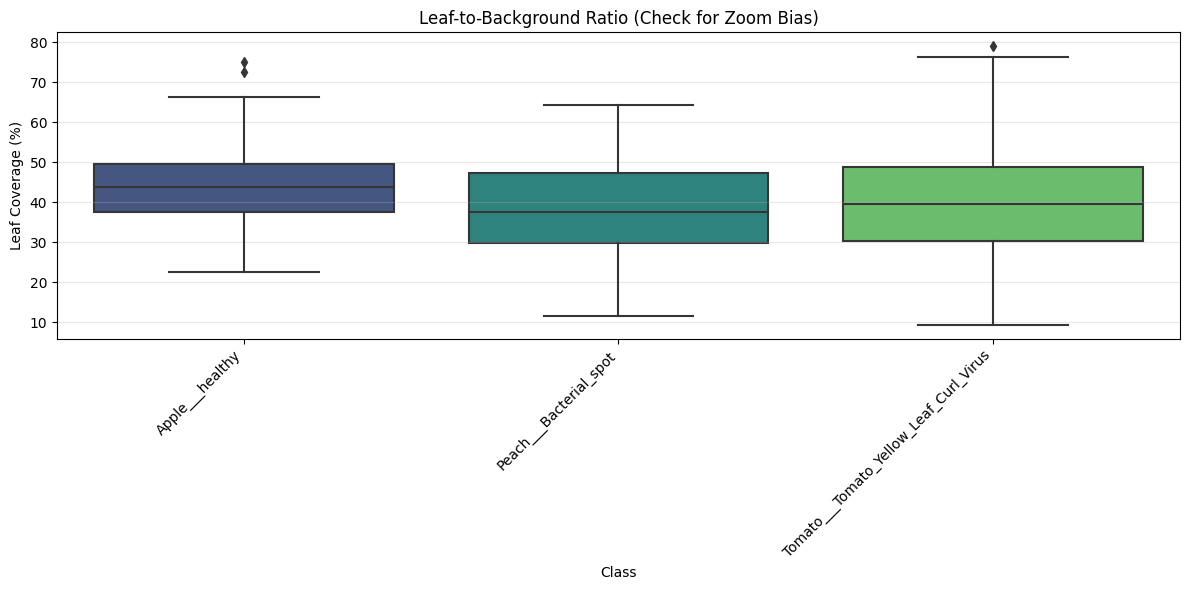

In [15]:
import cv2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. SETUP: Create a dedicated dataframe for this specific test
# We try to use 'target_classes' if defined, otherwise we define a quick list for clarity
if 'target_classes' not in locals():
    # Fallback: Pick 3 diverse classes
    target_classes = df['Class'].unique()[:3]

print(f"Checking Leaf Ratio for: {target_classes}")

# Sample 100 images per class for this test
leaf_ratio_df = df[df['Class'].isin(target_classes)].groupby('Class').head(100).copy()

# 2. Add the 'full_path' column (Crucial Step!)
leaf_ratio_df['full_path'] = leaf_ratio_df.apply(
    lambda row: f"../input/plantvillage-dataset/color/{row['Class']}/{row['Images']}", axis=1
)

# 3. Define the Function
def calculate_leaf_ratio(path):
    """
    Calculates percentage of image that is 'leaf' vs 'background'.
    Assumes background is relatively uniform/gray.
    """
    img = cv2.imread(path)
    if img is None: return 0
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Otsu's thresholding automatically finds the separation between leaf and background
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Count non-zero pixels (leaf area)
    leaf_pixels = cv2.countNonZero(thresh)
    total_pixels = img.shape[0] * img.shape[1]
    
    return (leaf_pixels / total_pixels) * 100

# 4. Run the Analysis
print("Calculating leaf-to-background ratios...")
leaf_ratio_df['leaf_ratio'] = leaf_ratio_df['full_path'].apply(calculate_leaf_ratio)

# 5. Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='leaf_ratio', data=leaf_ratio_df, palette='viridis')
plt.title('Leaf-to-Background Ratio (Check for Zoom Bias)')
plt.ylabel('Leaf Coverage (%)')
plt.xticks(rotation=45, ha='right') # Rotate labels nicely
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Section 4: Visual Inspection

## **Goal:** 
"Eyes-on" verification. We cannot trust statistics alone.

## **The "Turing Test" for Diseases:**
We use the tool below to display 
**Side-by-Side Comparisons** of confusing classes (e.g., *Early Blight* vs. *Late Blight*).
* **If WE can distinguish them:** The model should learn easily.
* **If WE are confused:** The model will likely struggle.

1. Inspecting Random Samples:


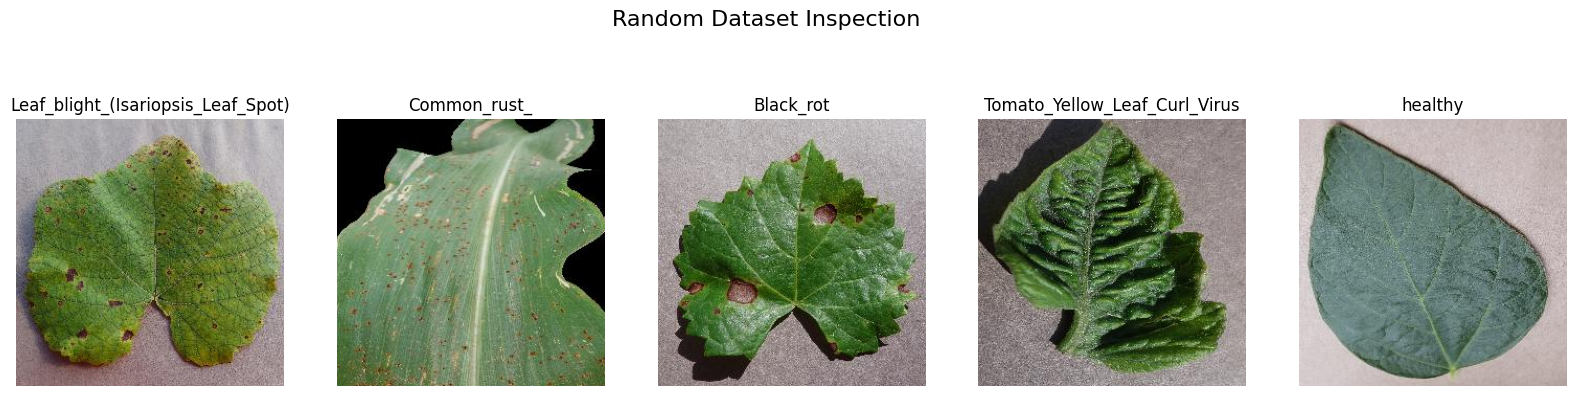


2. Inspecting a Specific Class (Apple Scab):


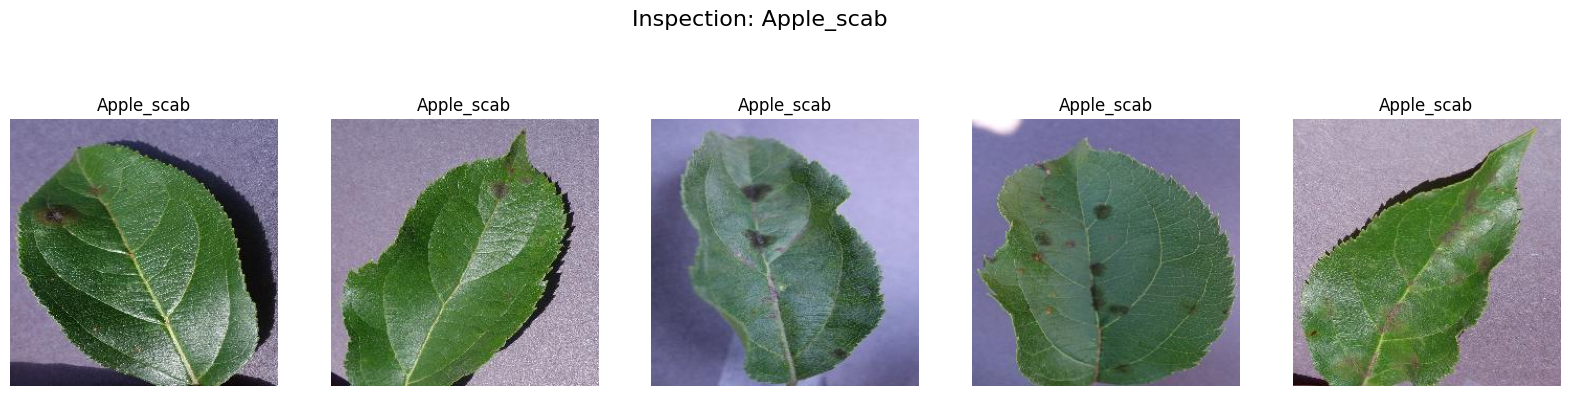


3. Challenge: Can you distinguish Early Blight vs Late Blight?


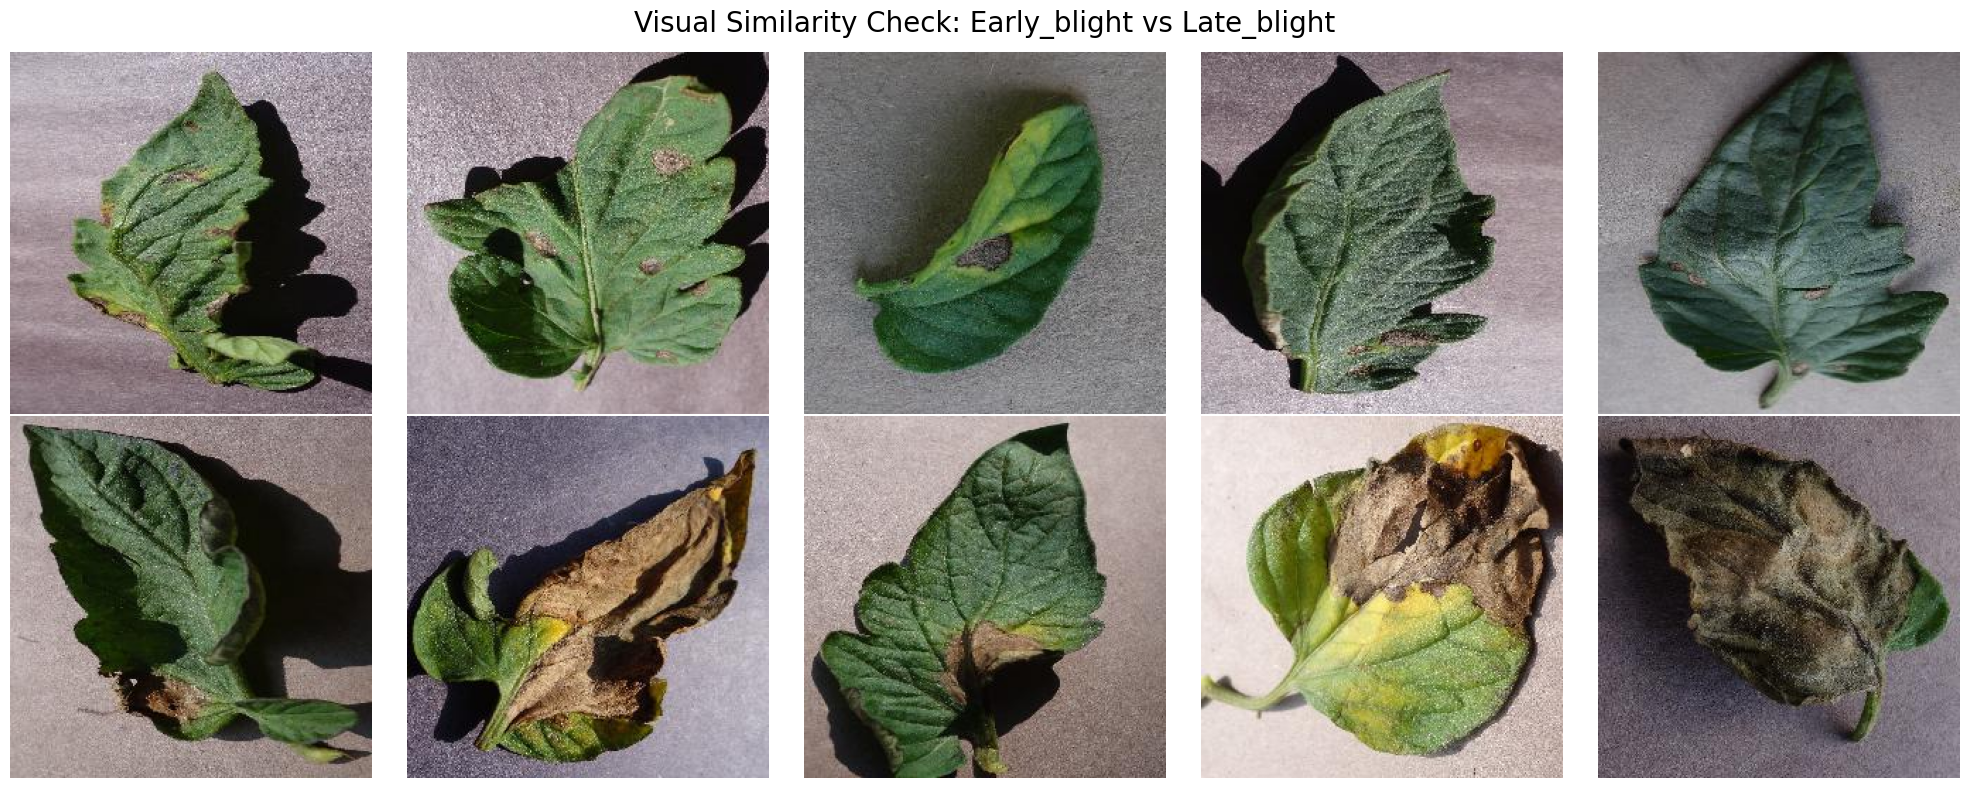

In [16]:
import matplotlib.pyplot as plt
from PIL import Image
import random

# --- TOOL 1: General Image Sampler ---
def visualize_samples(df, n_images=5, specific_class=None):
    """
    Displays a horizontal grid of images. 
    Can show random dataset samples OR specific class samples.
    """
    # 1. Filter Data
    if specific_class:
        if specific_class not in df['Class'].values:
            print(f"⚠️ Error: Class '{specific_class}' not found.")
            return
        # Handle case where class has fewer images than requested
        n_available = len(df[df['Class'] == specific_class])
        sample_df = df[df['Class'] == specific_class].sample(n=min(n_images, n_available))
    else:
        sample_df = df.sample(n=n_images)
    
    # 2. Plot
    plt.figure(figsize=(20, 5))
    if specific_class:
        plt.suptitle(f"Inspection: {specific_class.split('___')[-1]}", fontsize=16)
    else:
        plt.suptitle("Random Dataset Inspection", fontsize=16)

    for i, (idx, row) in enumerate(sample_df.iterrows()):
        plt.subplot(1, n_images, i + 1)
        path = f"../input/plantvillage-dataset/color/{row['Class']}/{row['Images']}"
        try:
            plt.imshow(Image.open(path))
            # Clean title
            plt.title(row['Class'].split('___')[-1])
            plt.axis('off')
        except:
            pass
    plt.show()


# --- TOOL 2: Visual Comparison (Side-by-Side) ---
def visualize_comparison(class_a, class_b, n=5):
    """
    Displays two rows of images to compare distinct classes.
    """
    # Handle sampling safely
    try:
        df_a = df[df['Class'] == class_a].sample(n)
    except ValueError: df_a = df[df['Class'] == class_a].head(n)
        
    try:
        df_b = df[df['Class'] == class_b].sample(n)
    except ValueError: df_b = df[df['Class'] == class_b].head(n)

    plt.figure(figsize=(20, 8))
    plt.suptitle(f"Visual Similarity Check: {class_a.split('___')[-1]} vs {class_b.split('___')[-1]}", fontsize=20)

    # Row 1
    for i, (idx, row) in enumerate(df_a.iterrows()):
        plt.subplot(2, n, i+1)
        path = f"../input/plantvillage-dataset/color/{row['Class']}/{row['Images']}"
        try:
            plt.imshow(Image.open(path))
            if i == 0: plt.ylabel("Class A", fontsize=14, rotation=0, labelpad=40)
            plt.axis('off')
        except: pass

    # Row 2
    for i, (idx, row) in enumerate(df_b.iterrows()):
        plt.subplot(2, n, n + i+1)
        path = f"../input/plantvillage-dataset/color/{row['Class']}/{row['Images']}"
        try:
            plt.imshow(Image.open(path))
            if i == 0: plt.ylabel("Class B", fontsize=14, rotation=0, labelpad=40)
            plt.axis('off')
        except: pass
        
    plt.tight_layout()
    plt.show()


# --- EXECUTION ---
print("1. Inspecting Random Samples:")
visualize_samples(df, n_images=5)

print("\n2. Inspecting a Specific Class (Apple Scab):")
# Uses the first available class to prevent errors
visualize_samples(df, n_images=5, specific_class=df['Class'].unique()[0])

print("\n3. Challenge: Can you distinguish Early Blight vs Late Blight?")
# These two are visually very similar
class_1 = 'Tomato___Early_blight'
class_2 = 'Tomato___Late_blight'
if class_1 in df['Class'].values and class_2 in df['Class'].values:
    visualize_comparison(class_1, class_2, n=5)

# Section 5: Biological Feature Analysis

## **Goal:** 
Prove that diseases are distinct **biologically**, not just visually.

We extract hand-crafted features to see if diseases have unique "fingerprints":
1.  **Chlorophyll Signal (Green Intensity):** Healthy leaves should have high green peaks; dead leaves (necrosis) should differ.
2.  **Color Space (HSV/RGB):** distinct clusters here indicate that color is a strong predictor for this specific disease.

### 4.1 Ground Truthing (The Human Baseline)
**Action:** We define tools to view random batches and side-by-side comparisons.
**Why:** Statistics can lie; eyes don't. We use this to manually check:
* **Label Noise:** Does a "Healthy" image actually look dead?
* **Visual Similarity:** Can *we* tell the difference between Early Blight and Late Blight? If a human expert can't distinguish them, a standard AI model likely won't either.


Comparing diverse biological conditions: 
['Apple___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Peach___Bacterial_spot', 'Potato___Early_blight']
Calculating Green intensities... (Extracting chlorophyll signal)


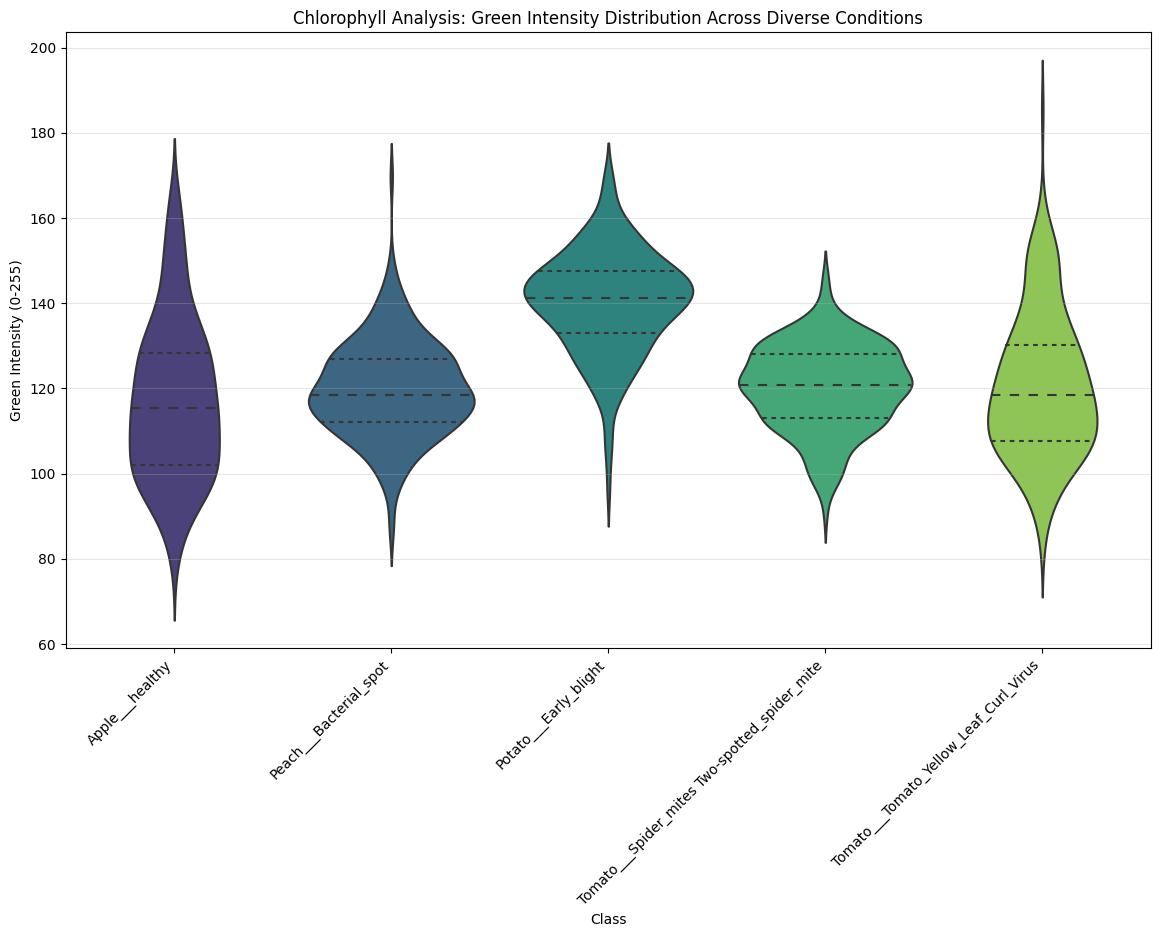

In [17]:
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. SMART SELECTION: Define keywords to capture biological diversity
# Instead of random indexes, we look for specific biological conditions
search_terms = ['Healthy', 'Virus', 'Bacterial', 'Early_blight', 'Mite']
target_classes = []

# Find one unique class for each keyword (e.g., Tomato_Healthy, Tomato_Virus...)
for term in search_terms:
    # Search for a class containing the term
    matches = [c for c in df['Class'].unique() if term.lower() in c.lower()]
    if matches:
        target_classes.append(matches[0]) # Take the first match found

# Remove duplicates and print what we found
target_classes = list(set(target_classes))
print(f"Comparing diverse biological conditions: \n{target_classes}")

# 2. DATA PREP: Sample specific classes
# We take up to 200 images per class to keep it fast but statistically significant
subset_df = df[df['Class'].isin(target_classes)].groupby('Class').head(200).copy()

def get_green_intensity(path):
    img = cv2.imread(path)
    if img is None: return 0
    # Return mean of Green channel (Index 1 in BGR format)
    return img.mean(axis=(0, 1))[1]

# Construct full paths
subset_df['full_path'] = subset_df.apply(
    lambda row: f"../input/plantvillage-dataset/color/{row['Class']}/{row['Images']}", axis=1
)

print("Calculating Green intensities... (Extracting chlorophyll signal)")
subset_df['Green_Intensity'] = subset_df['full_path'].apply(get_green_intensity)

# 3. VISUALIZATION: Violin Plot
# Why Violin? It shows the distribution (the 'fat' part) for many classes side-by-side
plt.figure(figsize=(14, 8))
sns.violinplot(
    data=subset_df, 
    x='Class', 
    y='Green_Intensity', 
    palette='viridis',
    inner='quartile' # Adds dotted lines for Median and Quartiles
)

plt.title('Chlorophyll Analysis: Green Intensity Distribution Across Diverse Conditions')
plt.xticks(rotation=45, ha='right') # Rotate labels so they don't overlap
plt.ylabel('Green Intensity (0-255)')
plt.grid(True, axis='y', alpha=0.3)
plt.show()

Comparing classes: ['Apple___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Corn_(maize)___Northern_Leaf_Blight']


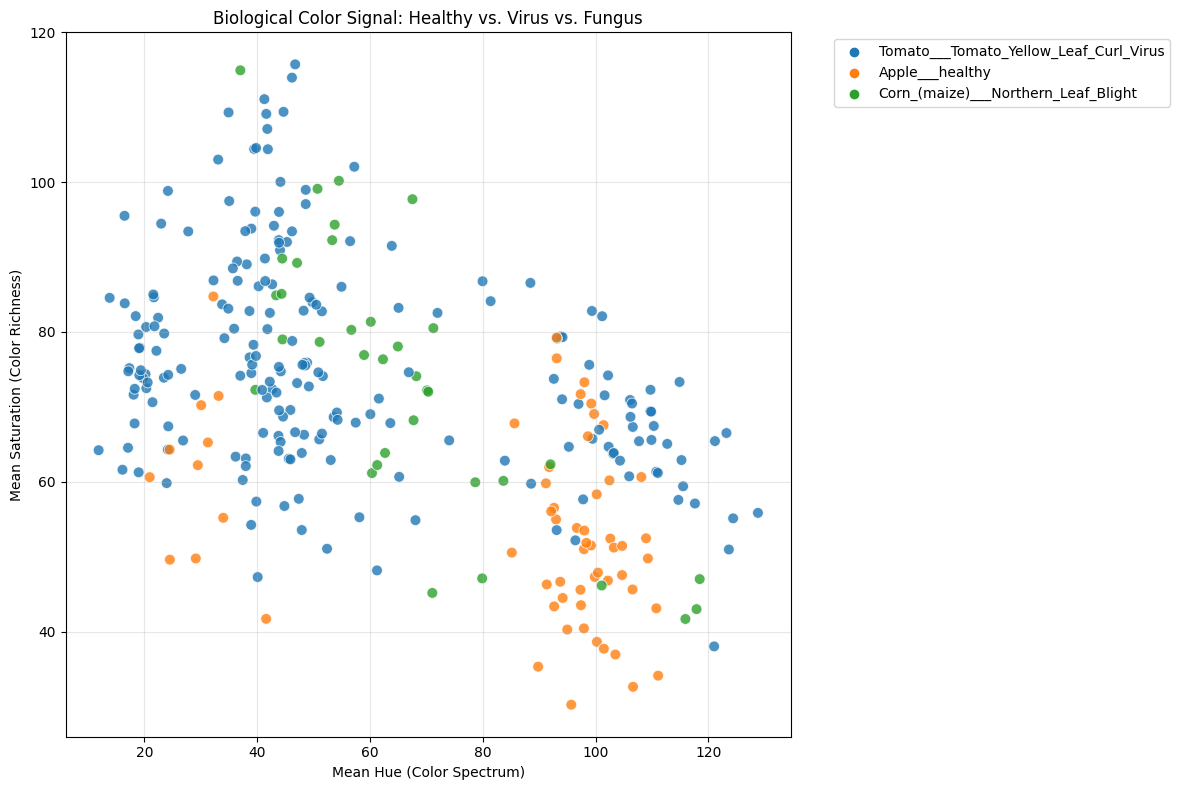

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pandas as pd

# 1. ROBUST CLASS SELECTION
def find_class_by_keyword(keyword, df):
    matches = [c for c in df['Class'].unique() if keyword.lower() in c.lower()]
    return matches[0] if matches else None

# Try to find one of each type
class_healthy = find_class_by_keyword('healthy', df)
class_virus = find_class_by_keyword('virus', df)
class_fungus = find_class_by_keyword('blight', df)

target_classes = [c for c in [class_healthy, class_virus, class_fungus] if c is not None]
print(f"Comparing classes: {target_classes}")

# 2. Extract HSV Features
subset_hsv = df[df['Class'].isin(target_classes)].sample(300).copy()

def get_hsv_stats(path):
    img = cv2.imread(path)
    if img is None: return [0, 0]
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    return hsv[:,:,0].mean(), hsv[:,:,1].mean()

# Construct paths and apply
subset_hsv['full_path'] = subset_hsv.apply(
    lambda row: f"../input/plantvillage-dataset/color/{row['Class']}/{row['Images']}", axis=1
)
hsv_data = subset_hsv['full_path'].apply(get_hsv_stats)
subset_hsv[['Mean_Hue', 'Mean_Saturation']] = pd.DataFrame(hsv_data.tolist(), index=subset_hsv.index)

# 3. Visualization (High Contrast)
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=subset_hsv, 
    x='Mean_Hue', 
    y='Mean_Saturation', 
    hue='Class', 
    alpha=0.8,
    palette='tab10', # <--- CHANGED: Uses distinct colors (Blue, Orange, Green)
    s=60             # <--- ADDED: Makes dots slightly larger for readability
)
plt.title('Biological Color Signal: Healthy vs. Virus vs. Fungus')
plt.xlabel('Mean Hue (Color Spectrum)')
plt.ylabel('Mean Saturation (Color Richness)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Calculating Texture Features (Contrast vs. Homogeneity)...


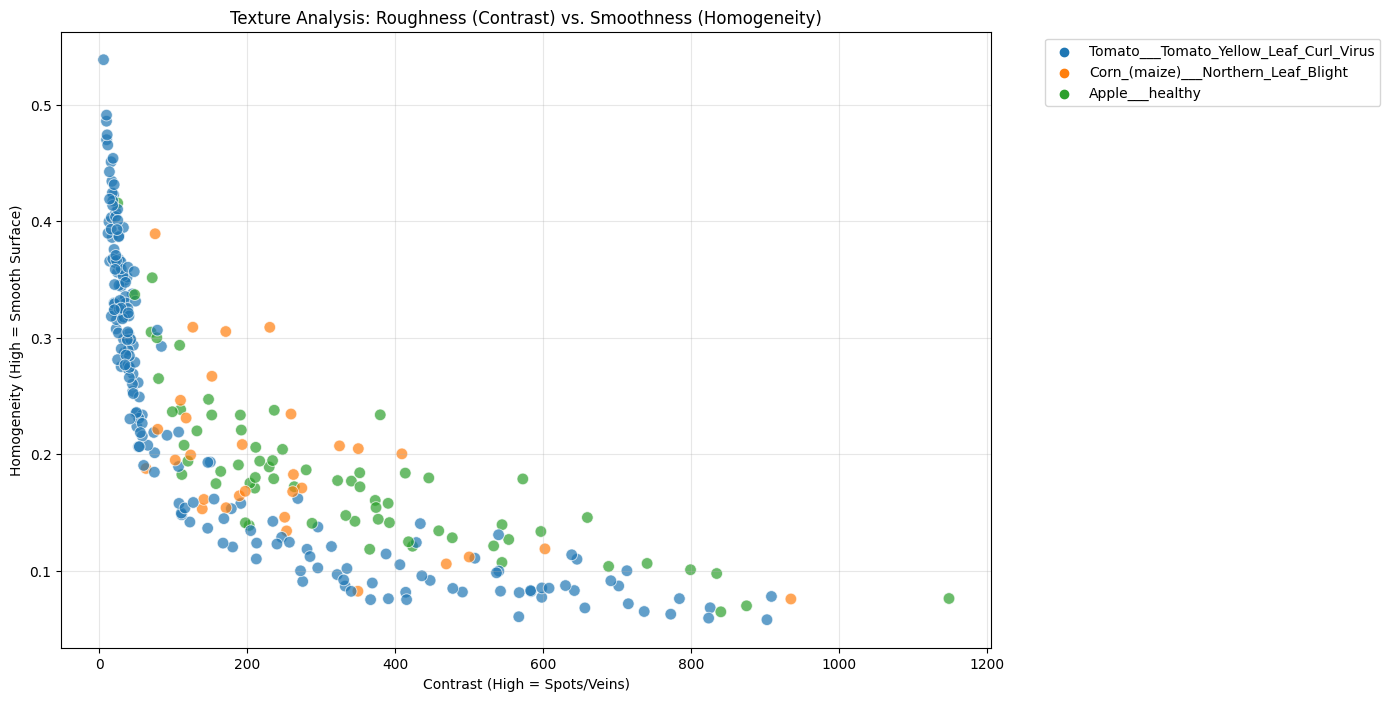

In [19]:
from skimage.feature import graycomatrix, graycoprops
import cv2

def get_texture_features(path):
    img = cv2.imread(path)
    if img is None: return [0, 0]
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Calculate GLCM (Texture Matrix)
    # distances=[1], angles=[0] looks at immediate right pixel neighbor
    glcm = graycomatrix(gray, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    
    # Extract texture properties
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    
    return contrast, homogeneity

# Use our existing subset of classes
texture_df = df[df['Class'].isin(target_classes)].sample(300).copy()

# Construct paths
texture_df['full_path'] = texture_df.apply(lambda row: f"../input/plantvillage-dataset/color/{row['Class']}/{row['Images']}", axis=1)

print("Calculating Texture Features (Contrast vs. Homogeneity)...")
texture_data = texture_df['full_path'].apply(get_texture_features)
texture_df[['Contrast', 'Homogeneity']] = pd.DataFrame(texture_data.tolist(), index=texture_df.index)

# Visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=texture_df,
    x='Contrast', 
    y='Homogeneity', 
    hue='Class', 
    palette='tab10', 
    alpha=0.7,
    s=70
)

plt.title('Texture Analysis: Roughness (Contrast) vs. Smoothness (Homogeneity)')
plt.xlabel('Contrast (High = Spots/Veins)')
plt.ylabel('Homogeneity (High = Smooth Surface)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

Comparing Colors between: Apple___Apple_scab vs Tomato___healthy
Calculating color intensity... this may take a moment.


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



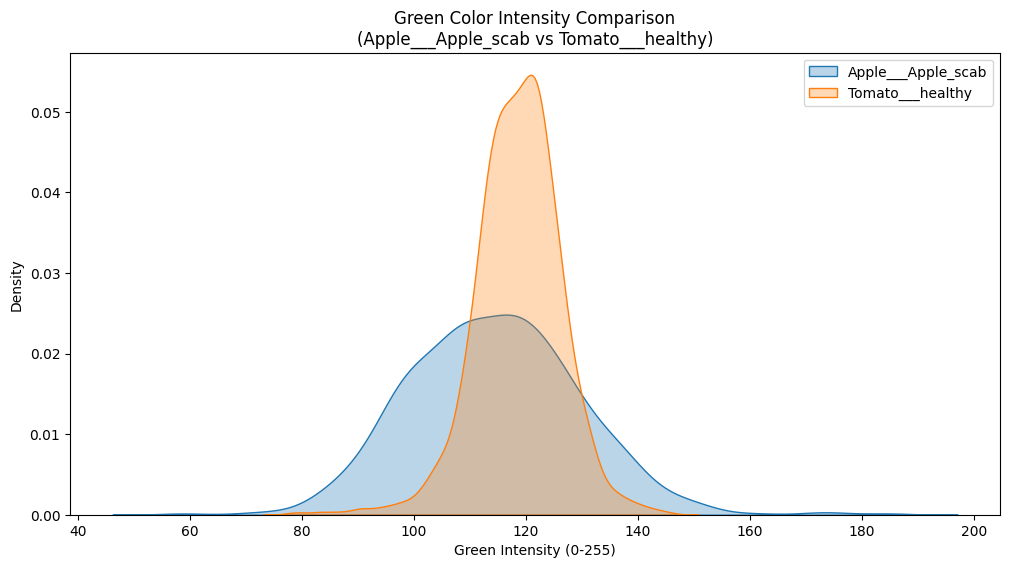

In [20]:
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# AUTOMATICALLY pick two different classes to compare
# We pick the first class and the last class in your list to likely get two different things
class_1 = df['Class'].unique()[0]
class_2 = df['Class'].unique()[-1]

target_classes = [class_1, class_2]
print(f"Comparing Colors between: {class_1} vs {class_2}")

# Create the subset with .copy() to avoid warnings
subset_df = df[df['Class'].isin(target_classes)].copy()

def get_avg_color(path):
    img = cv2.imread(path)
    if img is None: return [0, 0, 0]
    return img.mean(axis=(0, 1)) # Returns average B, G, R

# Construct full paths
subset_df['full_path'] = subset_df.apply(
    lambda row: f"../input/plantvillage-dataset/color/{row['Class']}/{row['Images']}", axis=1
)

# Calculate color stats
print("Calculating color intensity... this may take a moment.")
subset_df['avg_color'] = subset_df['full_path'].apply(get_avg_color)
subset_df[['Blue', 'Green', 'Red']] = pd.DataFrame(subset_df['avg_color'].tolist(), index=subset_df.index)

# Plotting
plt.figure(figsize=(12, 6))
for cls in target_classes:
    sns.kdeplot(subset_df[subset_df['Class'] == cls]['Green'], label=cls, fill=True, alpha=0.3)

plt.title(f'Green Color Intensity Comparison\n({class_1} vs {class_2})')
plt.xlabel('Green Intensity (0-255)')
plt.legend()
plt.show()

### 5.2 Full Color Spectrum Fingerprint
**Action:** We analyze Red, Green, and Blue distributions across classes.
**Why:** Some diseases are specific. Rust is reddish; Mildew is white/bluish. This boxplot shows if certain diseases have unique color "fingerprints" across the entire spectrum, not just green.

Calculating Full RGB Spectrum...


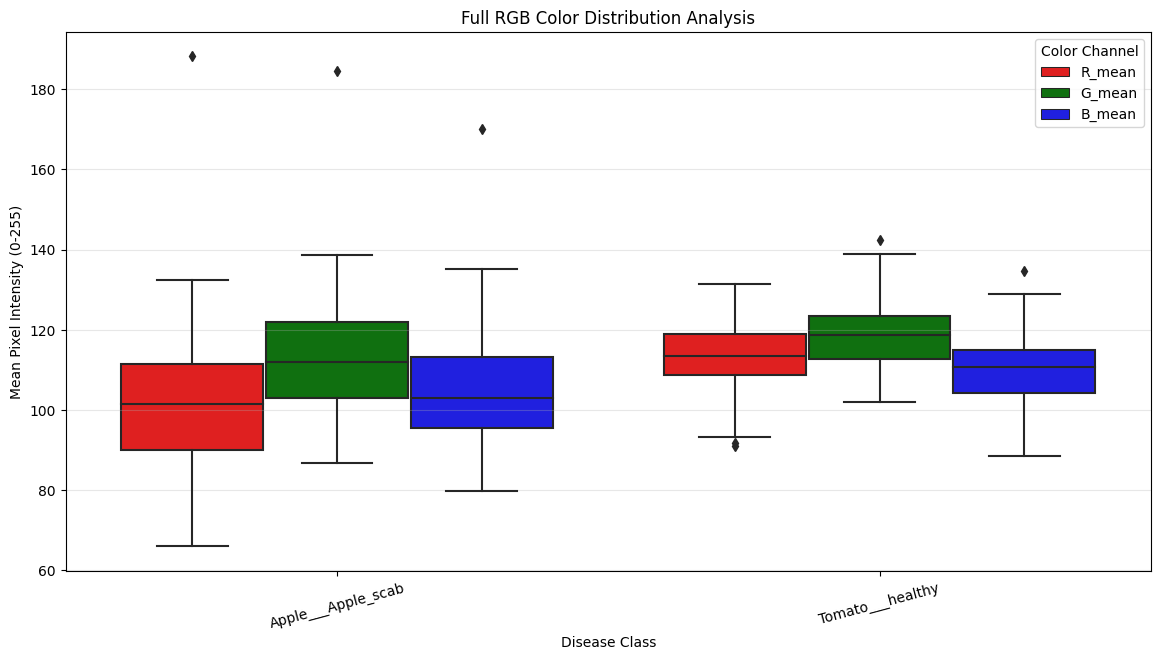

In [21]:
import cv2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Reuse your 'target_classes' from the previous diverse selection
# (Ensures we compare Healthy vs Virus vs Fungus)
rgb_df = df[df['Class'].isin(target_classes)].groupby('Class').head(100).copy()

def get_rgb_means(path):
    img = cv2.imread(path)
    if img is None: return [0, 0, 0]
    # CV2 reads in BGR, so we convert to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Return mean of each channel
    return img.mean(axis=(0, 1))

# 2. Extract Data
print("Calculating Full RGB Spectrum...")
rgb_data = rgb_df.apply(
    lambda row: get_rgb_means(f"../input/plantvillage-dataset/color/{row['Class']}/{row['Images']}"), 
    axis=1
)
rgb_df[['R_mean', 'G_mean', 'B_mean']] = pd.DataFrame(rgb_data.tolist(), index=rgb_df.index)

# 3. Melt the data for Seaborn (Format needed: Class | Channel | Value)
melted_rgb = rgb_df.melt(
    id_vars=['Class'], 
    value_vars=['R_mean', 'G_mean', 'B_mean'], 
    var_name='Channel', 
    value_name='Intensity'
)

# 4. Visualization: Boxplot with Hue
plt.figure(figsize=(14, 7))
sns.boxplot(
    data=melted_rgb, 
    x='Class', 
    y='Intensity', 
    hue='Channel', 
    palette={'R_mean': 'red', 'G_mean': 'green', 'B_mean': 'blue'} # Color-coded
)

plt.title('Full RGB Color Distribution Analysis')
plt.ylabel('Mean Pixel Intensity (0-255)')
plt.xlabel('Disease Class')
plt.xticks(rotation=15)
plt.legend(title='Color Channel')
plt.grid(True, axis='y', alpha=0.3)
plt.show()

# Section 6: Feasibility study

# Section 6: Feasibility Study (Manifold Learning)

## **The Million Dollar Question:** 
"Is this problem solvable?"

We project the high-dimensional images (65,536 pixels) into 2D space using **PCA** (Linear) and **t-SNE** (Non-Linear).

## **Interpretation:**

* **Distinct Clusters:** The classes are visually distinct. A CNN will likely achieve high accuracy (>95%).
* **Overlapping "Blobs":** The classes share significant visual similarities. We will need advanced architecture (ResNet/EfficientNet) and careful hyperparameter tuning.

### 6.1 Linear Separability Test (PCA)
**Action:** Principal Component Analysis (PCA) flattens images and reduces them to 2 dimensions based on pixel intensity variance.
**Why:** This tests if the problem is **"Easy" (Linear)**.
* If we see clear, separate clusters: A simple classifier (Logistic Regression) could work.
* If we see a mixed blob: The problem is **Non-Linear**. This justifies our future decision to use Deep Learning (CNNs), which excel at untangling non-linear data.

Running Feasibility Study on: ['Tomato___Healthy', 'Tomato___Yellow_Leaf_Curl_Virus', 'Tomato___Target_Spot']


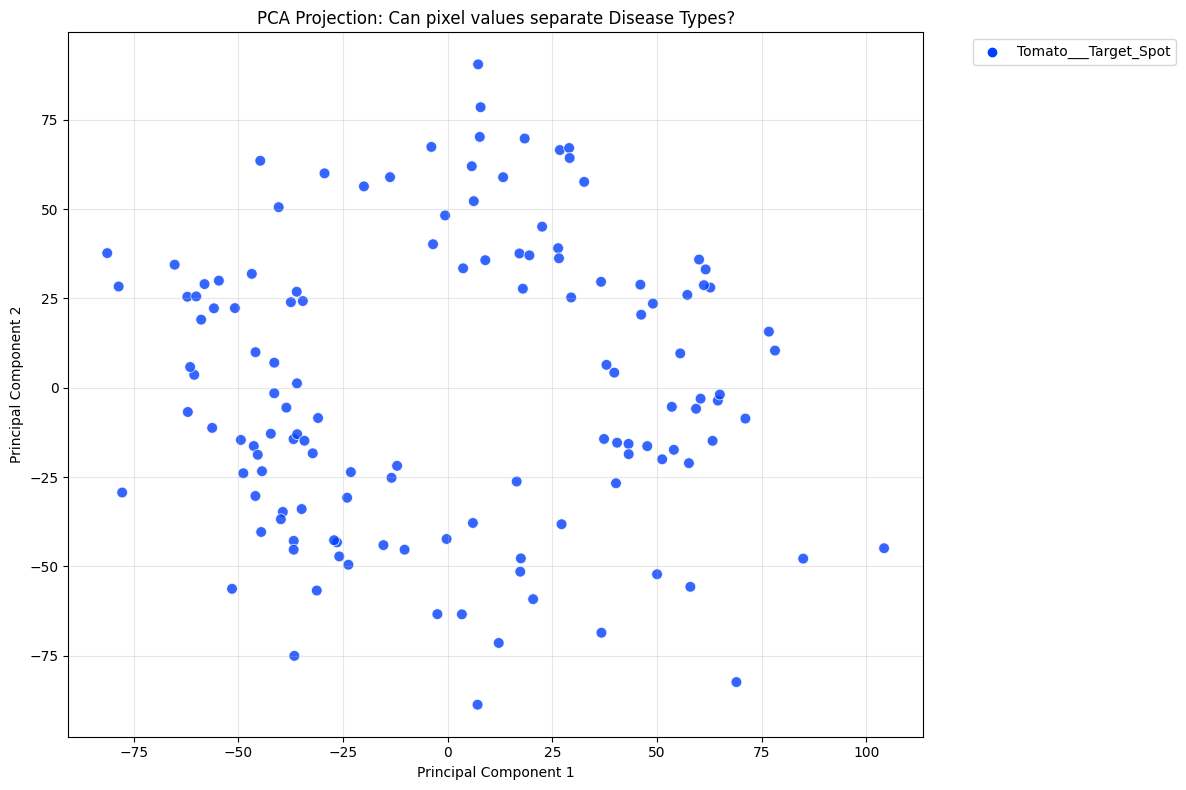

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import cv2
import seaborn as sns
import matplotlib.pyplot as plt

# --- FIX: Explicitly define diverse classes for this study ---
# We compare 3 distinct biological conditions to see if the AI can separate them
feasibility_classes = [
    'Tomato___Healthy',                 # Baseline
    'Tomato___Yellow_Leaf_Curl_Virus',  # Viral (Shape change/Curling)
    'Tomato___Target_Spot'              # Fungal (Texture change/Spots)
]
print(f"Running Feasibility Study on: {feasibility_classes}")

# 1. Select a subset (400 images total)
pca_df = df[df['Class'].isin(feasibility_classes)].groupby('Class').head(130).copy()

# 2. Load and Flatten Images
def load_and_flatten(path):
    img = cv2.imread(path)
    if img is None: return None
    img = cv2.resize(img, (64, 64)) 
    return img.flatten() 

pca_df['full_path'] = pca_df.apply(lambda row: f"../input/plantvillage-dataset/color/{row['Class']}/{row['Images']}", axis=1)
flat_images = pca_df['full_path'].apply(load_and_flatten).tolist()

valid_indices = [i for i, x in enumerate(flat_images) if x is not None]
X = np.array([flat_images[i] for i in valid_indices])
y = pca_df['Class'].iloc[valid_indices].values

# 3. Apply PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Visualize
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=X_pca[:,0], 
    y=X_pca[:,1], 
    hue=y, 
    palette='bright', 
    alpha=0.8,        
    s=60
)
plt.title('PCA Projection: Can pixel values separate Disease Types?')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 6.2 Manifold Learning (t-SNE)
**Action:** t-SNE (t-Distributed Stochastic Neighbor Embedding) groups images based on complex visual similarity, not just pixel values. <br>
**Why:** This simulates how a Neural Network "sees" the data.
* **Islands:** Distinct clusters mean the diseases look fundamentally different. Feasibility is **High**.
* **Overlaps:** If "Tomato Early Blight" and "Tomato Late Blight" mix together, it proves they are visually confusing. We will need to prioritize these classes for detailed error analysis later.

Running t-SNE... (This allows the AI to 'group' similar looking leaves)


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

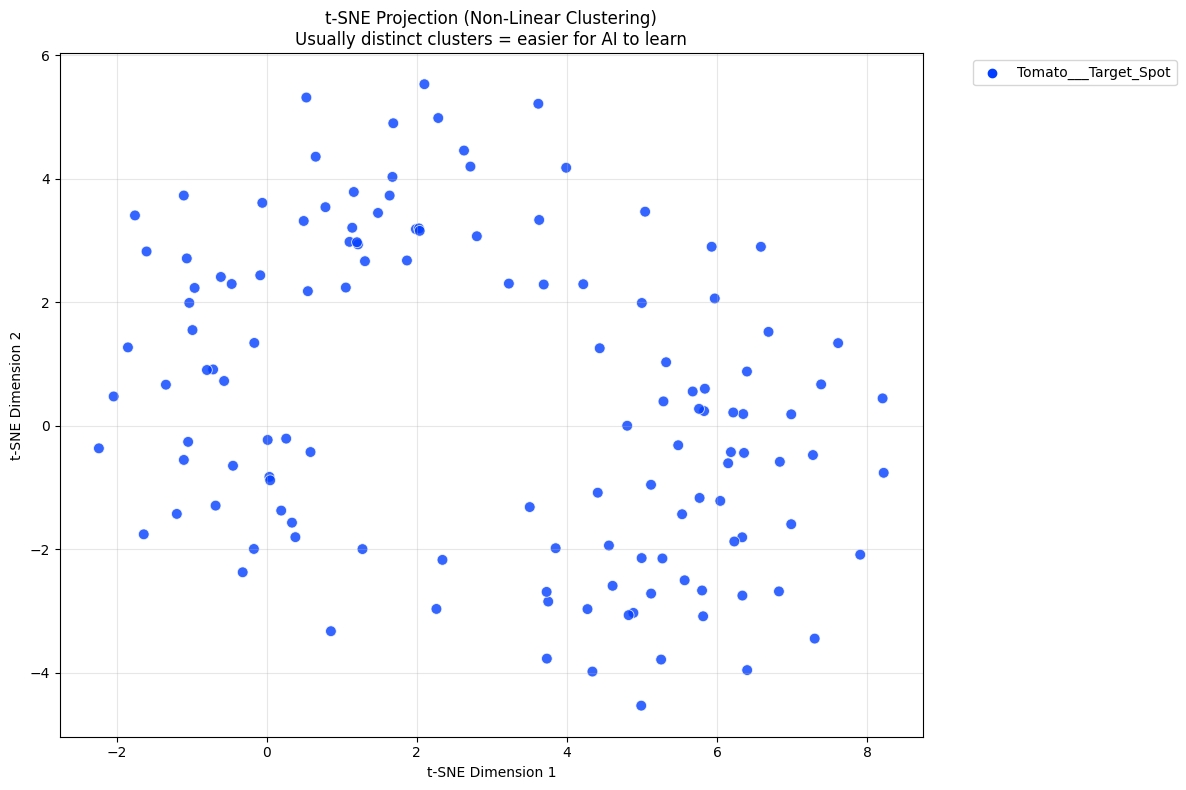

In [23]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# We use the same 'X_scaled' and 'y' from your PCA step
# If you skipped PCA, run the PCA data prep block first!

print("Running t-SNE... (This allows the AI to 'group' similar looking leaves)")
# Perplexity=30 is standard. n_iter=1000 ensures it settles.
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=X_tsne[:,0], 
    y=X_tsne[:,1], 
    hue=y, 
    palette='bright', # High contrast colors
    alpha=0.8,
    s=60
)

plt.title('t-SNE Projection (Non-Linear Clustering)\nUsually distinct clusters = easier for AI to learn')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 📝 Summary of Findings (Week 1)

## 1. Data Quality
* **Resolution:** All images are [256x256] (Standardized).
* **Background:** Corner pixel analysis confirms a somehwat Uniform background.
* **Lighting:** Brightness distribution is more or less consistent.

## 2. Class Balance
* **Dominant Classes:**
The top three classes are
1. Orange___Haunglongbing_(Citrus_greening)
2. Tomato___Tomato_Yellow_Leaf_Curl_Virus
3. Soybean___healthy
 <p></p>
 
* **Rare Classes:** 
The rarest classes are
1. Corn_(maize)___healthy
2. Potato___healthy
3. Apple___Cedar_apple_rust
 <p></p>

## 3. Feasibility Verdict
* **t-SNE Analysis:** Visual clusters did not form clearly for distinct diseases.
* **Difficulty:** High.